# Viewing the dataset

This notebook demonstrates how to access metadata and arrays from the HDF5 dataset.

In [14]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

Make sure to update the filepath in the block below!

In [15]:
h5_filepath = '/data/bwedig/mejiro/roman_data_challenge_rung_1_dev/06/roman_data_challenge_rung_1_v_0_1.h5'  # TODO update this path!
f = h5py.File(h5_filepath, 'r')

The dataset is structured in the following way:

* `images`
    * `strong_lens_00000001`
        * `exposure_00000001_F106` dataset with the F106 exposure, a (91, 91) array
        * `exposure_00000001_F129`
        * ...
    * `strong_lens_00000002` dataset with the SNR per pixel, a (91, 91) array

In [16]:
# print all attributes for the root group
for key, value in f.attrs.items():
    print(f"{key}: {value}")

author: ['bwedig@astromusers.wustl.edu' 'username@host for calculation']
created: 2025_09_01-08_17_33_PM
dataset_version: 0.1
galsim_version: ['2.5.1' 'GalSim version']
lenstronomy_version: ['1.13.2' 'lenstronomy version']
mejiro_version: ['2.0.0' 'mejiro version']
slsim_version: ['0.1.0' 'SLSim version']
stpsf_version: ['2.1.0' 'STPSF version']


The `images` group contains a group for each strong lens.

In [17]:
# list the first 10 groups in the 'images' group
images_group = f['images']
pprint(list(images_group.keys())[:10])

['strong_lens_00000000',
 'strong_lens_00000001',
 'strong_lens_00000002',
 'strong_lens_00000003',
 'strong_lens_00000004',
 'strong_lens_00000005',
 'strong_lens_00000006',
 'strong_lens_00000007',
 'strong_lens_00000008',
 'strong_lens_00000009']


Each strong lens group contains the exposures in each filter. It also carries information about the system (redshifts, Einstein radius, etc.) and its observation (Roman detector, detector position).

In [18]:
strong_lens = images_group['strong_lens_00000000']

for attr_key, attr_value in strong_lens.attrs.items():
    print(f"{attr_key}: {attr_value}")

print(f'\nData: {list(strong_lens.keys())}')

detector: ['1' 'Detector']
detector_position_x: ['3679' 'Detector X position']
detector_position_y: ['3679' 'Detector Y position']
main_halo_mass: ['2437140025829.108' 'Lens galaxy main halo mass [M_sun]']
mu: ['3.3483764743718085' 'Flux-weighted magnification of source']
sigma_v: ['164.39260885041935' 'Lens galaxy velocity dispersion [km/s]']
substructure: ['False' 'Is substructure present in this lens?']
theta_e: ['0.3912371741635608' 'Einstein radius [arcsec]']
uid: ['00000000' 'Unique identifier for system assigned by mejiro']
z_lens: ['1.210999999999999' 'Lens galaxy redshift']
z_source: ['3.4214121522600025' 'Source galaxy redshift']

Data: ['exposure_00000000_F106', 'exposure_00000000_F129', 'exposure_00000000_F158']


The attributes of each exposure contains filter-specific quantities such as magnitudes and SNR.

In [19]:
for attr_key, attr_value in strong_lens['exposure_00000000_F106'].attrs.items():
    print(f"{attr_key}: {attr_value}")

exposure_time: ['642' 'Exposure time [seconds]']
filter: ['F106' 'Filter']
fov: ['10.01' 'Field of view [arcsec]']
lens_magnitude: ['22.921587656771713' 'Lens galaxy magnitude']
lensed_source_magnitude: ['23.035124354985985' 'Lensed source galaxy magnitude']
pixel_scale: ['0.11' 'Pixel scale [arcsec/pixel]']
snr: ['32.27343763797688' 'Signal-to-noise ratio']
source_magnitude: ['24.34721005979316' 'Unlensed source galaxy magnitude']
units: ['Counts/sec' 'Units of pixel values']


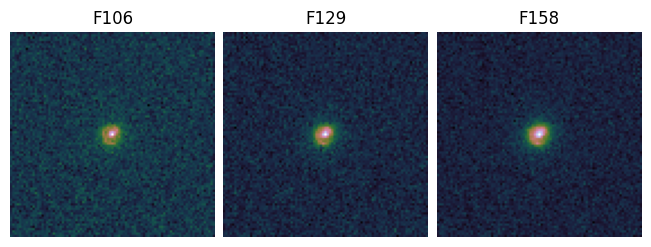

In [20]:
_, ax = plt.subplots(1, len(list(strong_lens.keys())), constrained_layout=True)

for i, (data_key, data_value) in enumerate(strong_lens.items()):
    ax[i].imshow(np.log10(data_value), cmap='cubehelix')
    ax[i].set_title(strong_lens[data_key].attrs['filter'][0])
    ax[i].axis('off')

plt.show()

# Example: create a TensorFlow Dataset from F129 exposures labeled with `substructure` flag

In [35]:
filter = 'F129'

data, labels = [], []
for strong_lens_group in images_group.keys():
    id = images_group[strong_lens_group].attrs['uid'][0]
    substructure_flag = images_group[strong_lens_group].attrs['substructure'][0]
    exposure = images_group[strong_lens_group][f'exposure_{id}_{filter}']

    data.append(exposure)
    labels.append(1 if substructure_flag == 'True' else 0)

print(f'data: {np.array(data).shape}, labels: {np.array(labels).shape}')

data: (448, 91, 91), labels: (448,)


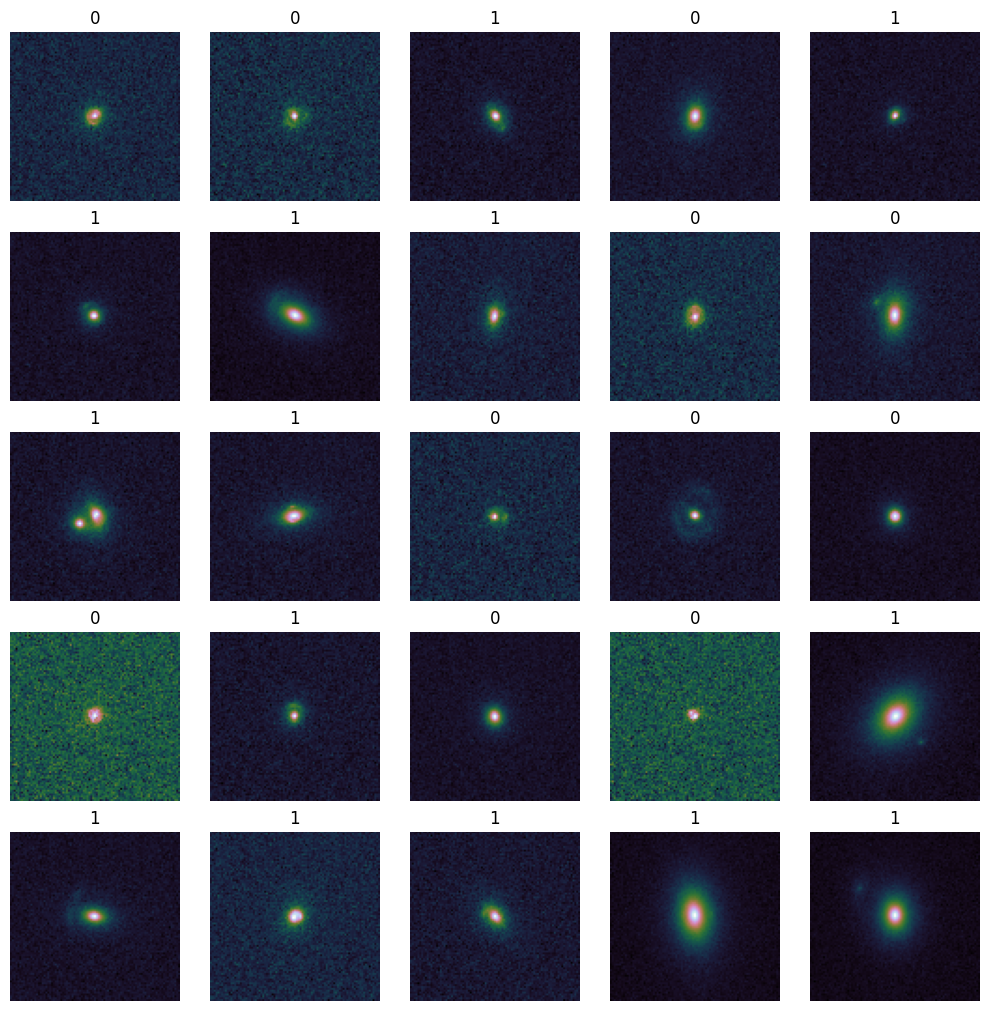

In [37]:
grid_size = 5
_, ax = plt.subplots(grid_size, grid_size, figsize=(10, 10), constrained_layout=True)

for i, (exposure, substructure_flag) in enumerate(zip(data[:grid_size ** 2], labels[:grid_size ** 2])):
    ax[i // grid_size, i % grid_size].imshow(np.log10(exposure), cmap='cubehelix')
    ax[i // grid_size, i % grid_size].set_title(substructure_flag)
    ax[i // grid_size, i % grid_size].axis('off')

plt.show()

Then,

```
from tensorflow import data as tf_data

ds = tf_data.Dataset.from_tensor_slices((data, labels))
```